In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

try:
    DATA_FOLDER_NAME = 'project'  
    DATA_PATH = f'../input/{DATA_FOLDER_NAME}/'
    train_df = pd.read_csv(DATA_PATH+"train.csv")
    test_df = pd.read_csv(DATA_PATH+"test.csv")
except FileNotFoundError:
    print("train.csv and test.csv not in same directory.")

In [19]:
# Display basic information
print("--- Training Data Info ---")
train_df.info()

# Display first few rows
print("\n--- Training Data Head ---")
print(train_df.head())

# Get statistical summary
print("\n--- Training Data Description ---")
print(train_df.describe().T)

--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    8000 non-null   int64 
 1   Therapy Hours         8000 non-null   int64 
 2   Initial Health Score  8000 non-null   int64 
 3   Lifestyle Activities  8000 non-null   object
 4   Average Sleep Hours   8000 non-null   int64 
 5   Follow-Up Sessions    8000 non-null   int64 
 6   Recovery Index        8000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 437.6+ KB

--- Training Data Head ---
     Id  Therapy Hours  Initial Health Score Lifestyle Activities  \
0  9255              5                    49                   No   
1  1562              2                    48                  Yes   
2  1671              2                    81                   No   
3  6088              2                    46                 

In [20]:
# Check for duplicates
print(f"Number of duplicate rows: {train_df.duplicated().sum()}")

# Drop duplicates if any were found
train_df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


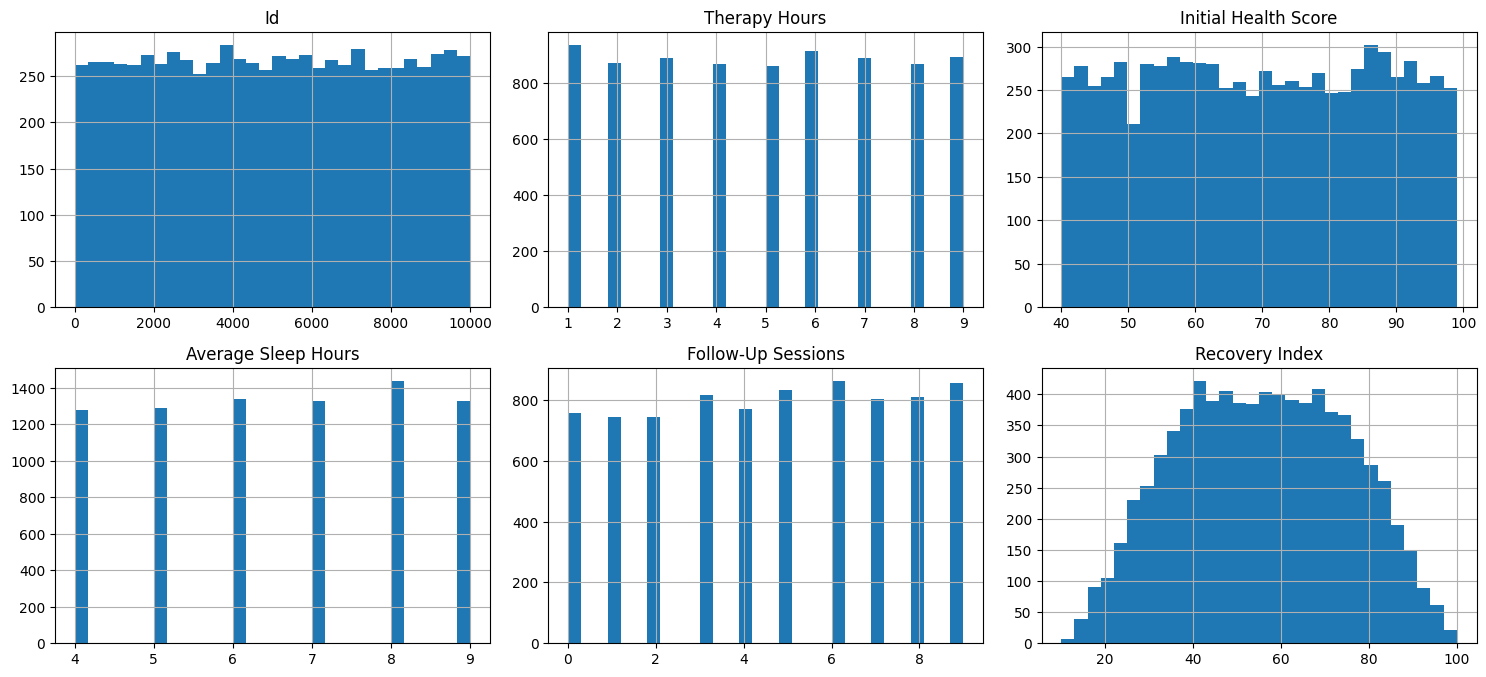

In [21]:
# Plot histograms for all numerical features
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

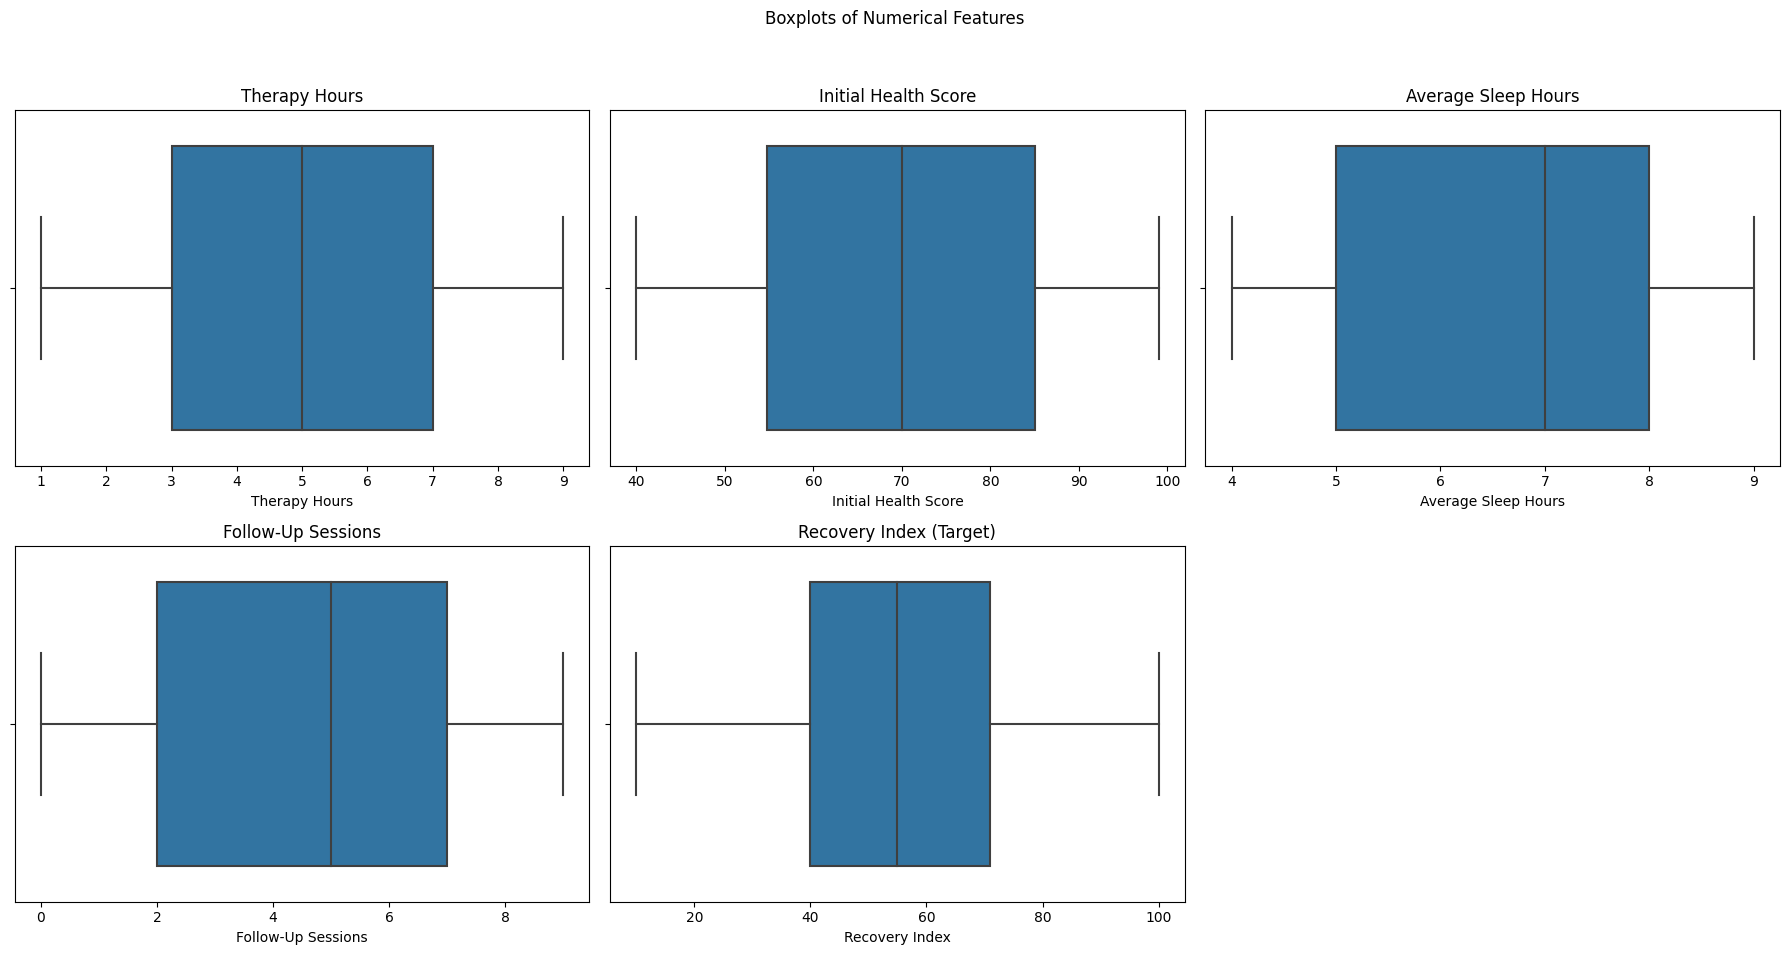

In [22]:
# Plot boxplots for key numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots of Numerical Features')

sns.boxplot(ax=axes[0, 0], x=train_df['Therapy Hours'])
axes[0, 0].set_title('Therapy Hours')

sns.boxplot(ax=axes[0, 1], x=train_df['Initial Health Score'])
axes[0, 1].set_title('Initial Health Score')

sns.boxplot(ax=axes[0, 2], x=train_df['Average Sleep Hours'])
axes[0, 2].set_title('Average Sleep Hours')

sns.boxplot(ax=axes[1, 0], x=train_df['Follow-Up Sessions'])
axes[1, 0].set_title('Follow-Up Sessions')

sns.boxplot(ax=axes[1, 1], x=train_df['Recovery Index'])
axes[1, 1].set_title('Recovery Index (Target)')

# Hide empty subplot
axes[1, 2].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

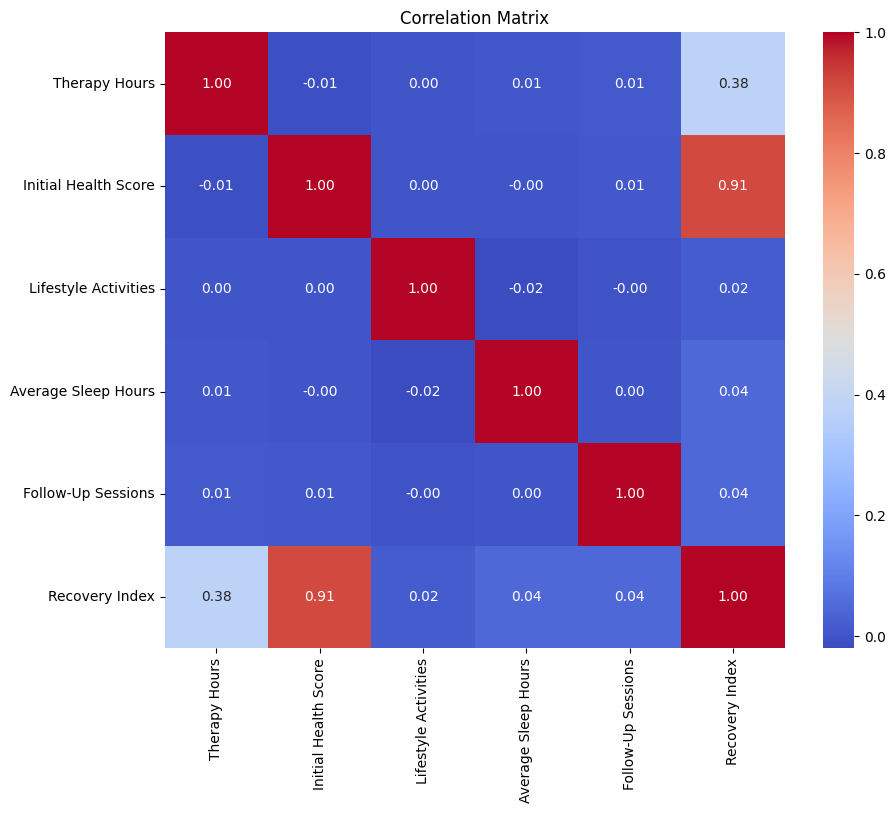

In [23]:
# Create a copy for plotting and encode 'Lifestyle Activities'
corr_df = train_df.copy()
le = LabelEncoder()
if 'Lifestyle Activities' in corr_df.columns:
    corr_df['Lifestyle Activities'] = le.fit_transform(corr_df['Lifestyle Activities'])

# Calculate correlation matrix
correlation_matrix = corr_df.drop('Id', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()